Erreur =  0.0  %


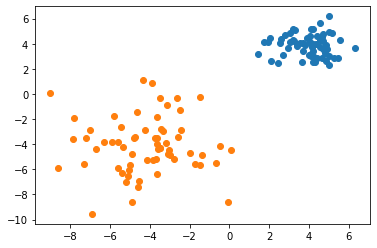

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import math

# classification par la méthode des k plus proches voisins
def kppv(x:np.array,appren:np.array,oracle,K):
    clas = []
    # récupération des données
    for i in range(len(x[0])):
        point = (x[0][i],x[1][i])
        ppps = [(0,999999)]*K
        for j in range(len(appren[0])):
            tmppoint = j
            # calcul des distances séparant les points
            dist = math.sqrt((appren[0][tmppoint]-point[0])**2+(appren[1][tmppoint]-point[1])**2)
            for k in range(len(ppps)):
                # classification des points selon la distance de séparation
                if(ppps[k][1]>=dist):
                    tmp = ppps[k]
                    ppps[k] = (tmppoint,dist)
                    tmppoint = tmp[0]
                    dist = tmp[1]
        sumtmp = 0
        # classification des points dans les différentes classes
        for y in ppps:
            sumtmp+=oracle[y[0]]
        clas.append(0 if sumtmp<= len(ppps)/2 else 1)
        np.append(appren,[x[0][i],x[1][i]])
        np.append(oracle,0 if sumtmp<= len(ppps)/2 else 1)

    return np.array(clas)

# visualisation de la représentation graphique de la classification
def affiche_classe(x,clas,K):
    for k in range(0,K):
        ind=(clas==k)
        plt.plot(x[0,ind],x[1,ind],"o")
    plt.show()

# données de test
mean1 = [4, 4]
cov1 = [[1, 0], [0, 1]] #
data1 = np.transpose(np.random.multivariate_normal(mean1, cov1, 128))
mean2 = [-4, -4]
cov2 = [[4, 0], [0, 4]] #
data2 = np.transpose(np.random.multivariate_normal(mean2, cov2, 128))
data=np.concatenate((data1, data2), axis=1)
oracle=np.concatenate((np.zeros(128),np.ones(128)))
test1=np.transpose(np.random.multivariate_normal(mean1, cov1, 64))
test2=np.transpose(np.random.multivariate_normal(mean2, cov2,64))
test=np.concatenate((test1,test2), axis=1)
K=3
clas=kppv(test,data,oracle,K)

# calcul d'erreur de l'algorithme
error = 0
for x in range(len(test[0])):
    if clas[x]==0:
        if test[0][x] == test1[0][x % 64] and test[1][x] == test1[1][x % 64]:
            continue
        error+=1
    else:
        if test[0][x] == test2[0][x % 64] and test[1][x] == test2[1][x % 64]:
            continue
        error+=1
error*=100
error/=len(test[0])
print("Erreur = ",error," %")
# affiche le graphique avec les deux classes distinctes
affiche_classe(test,clas,2)